<a href="https://colab.research.google.com/github/jcjimenezb123/ProgramacionPython/blob/master/ProgramacionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Optimización. Programación Lineal

La programación lineal son técnicas matemáticas empleadas para asignar, **de forma óptima**, los **recursos limitado**s a distintas demandas, tareas, operaciones o productos que compiten entre ellos, es decir, la programación de actividades para obtener un resultado óptimo. La programación lineal utiliza un modelo matemático para describir y formular el problema, el término línea se utiliza cuando todas las funciones matemáticas del modelo son funciones lineales (ecuaciones o inecuaciones).

La programación lineal utiliza un modelo matemático para describir el problema. El adjetivo
lineal significa que todas las funciones matemáticas del modelo deben ser funciones lineales. En
este caso, la palabra programación no se refiere aquí a términos computacionales; en esencia es
sinónimo de planeación. Por lo tanto, la programación lineal involucra la planeación de actividades
para obtener un resultado óptimo; esto es, el resultado que mejor alcance la meta especificada
—de acuerdo con el modelo matemático— entre todas las alternativas factibles.

La solución de un problema con programación lineal consiste en la identificación de los elementos básicos de un modelo matemático. Un modelo es una representación ideal de un sistema y la forma en que este opera.

Un modelo es el resultado de una abstracción de un sistema real, eliminando las complejidades y haciendo suposiciones pertinentes, se aplica una técnica matemática y se obtiene una representación simbólica del mismo. Un modelo matemático consta al menos de tres componentes.
* Variables de decisión y parámetros.
* Restricciones.
* Función objetivo.
Un modelo de programación lineal se expresa de manera general como
$$
Z_{[Max/Min]}=c_1x_1+c_2x_2+c_3x_3+\cdots +c_nx_n
$$

Sujeto a:
$$
a_{1,1}x_1+a_{1,2}x_2+a_{1,3}x_3+\cdots +a_{1,n}x_n<b_1\\
a_{2,1}x_1+a_{2,2}x_2+a_{2,3}x_3+\cdots +a_{2,n}x_n<b_2\\
\vdots \\
a_{n,1}x_1+a_{n,2}x_2+a_{n,3}x_3+\cdots +a_{n,n}x_n<b_n\\
x_1+x_2+x_3+\cdots +x_n>0
$$

Donde $c_i$ son coeficientes a determinar de tal manera que sea optimo cumpliendo las restricciones

Problema: Una empresa de instalaciones dispone de 195Kg de cobre, 20Kg de titanio y 14Kg de aluminio. Para fabricar 100 metros de cable de tipo A se necesitan 10Kg de cobre, 2Kg de titanio y 1Kg de aluminio, mientras que para fabricar 100 metros de cable del tipo B se necesitan 15Kg de cobre, 1Kg de titanio y 1Kg de aluminio. El beneficio que se obtiene de 100 metros de cable del tipo A es de 1500 euros, y por 100 metros de cable del tipo B es de 1000 euros. Calcular los metros de cable de cada tipo que se deben fabricar para maximizar el beneficio de la empresa.

El primer paso es identificar las variables de decisión. Son las variables que se desean determinar para cumplir la función objetivo, son las variables que se deben cambiar para lograr maximizar o minimizar la función objetivo.

En este caso se desea determinar la cantidad de rollos de 100 metros de cable del tipo A y del tipo B para maximizar el beneficio.

Llamemos A a la cantidad de rollos de 100 metros del tipo A.
Llamemos B a la cantidad de rollos de 100 metros del tipo B.

Con esta abastracción ya estamos simplificando el problema.

Sabemos que se obtiene un beneficio de 1500 euros por cada rollo del tipo A y 1000 euros por cada rollo del tipo B. Por lo tanto el beneficio total se calcula como

$$
Z_{MAX}=1500A+1000B
$$

El siguiente paso es identificar las restricciones del problema. Las restricciones se componen de ecuaciones o in-ecuaciones que expresan los límites que pueden tomas las variables de decisión ya que no se tienen recursos infinitos. En este caso sabemos que Cobre, Titanio y Aluminio están limitadas, y sabemos la cantidad que se requiere de cada metal para fabricar cada rollo. Esta información se resume en la siguiente tabla.

Material |Tipo A|Tipo B|Disponibilidad|
---|---|---|---|
Cobre| 10|15|195|
Titanio | 2|1|20|
Aluminio | 1|1|14|

Haciendo la abstracción de esta información y expresándola en su forma canonica, tenemos:

$$
Z_{MAX}=1500A+1000B\\
\text{Sujeto a:}\\
\begin{split}
10A+15B&<=195&\text{ Cobre}\\
2A+B&<=20&\text{ Titanio}\\
A+B&<=14&\text{ Aluminio}\\
A,B&>=0
\end{split}
$$

El objetivo es elegir los valores de A y B que maximicen Z. Tal vez nuestro primer pensamiento pueda ser, solo fabricar rollos del tipo A que dan un mejor beneficio que B, ésta es una solución factible. Pero analicemos un poco esta respuesta, si solo fabricamos rollos del tipo A entonces solo podremos fabricar 10 rollos porque se requieren 2Kg de titanio por cada rollo y solo tenemos 20Kg, por lo tanto solo podemos fabricar 10 rollos de A y se deja de usar 95Kg de Cobre y el beneficio total sería Z = 15000

Si ahora pensamos en fabricar solo rollos del tipo B, la máxima cantidad a fabricar serían 13 rollos, ya que la cantidad de Cobre es restrictiva para solo fabricar esa cantidad, pero se deja de usar 7Kg de Titanio y 1Kg de Aluminio y el beneficio total sería Z = 13000

Entonces se debe elegir la cantidad adecuada para fabricar rollos del tipo A y del tipo B de tal manera que se maximice el beneficio Z, sin rebasar la cantidad disponible de cada metal y por otro lado usar la mayor cantidad de material, cumpliendo las restricciones dadas.

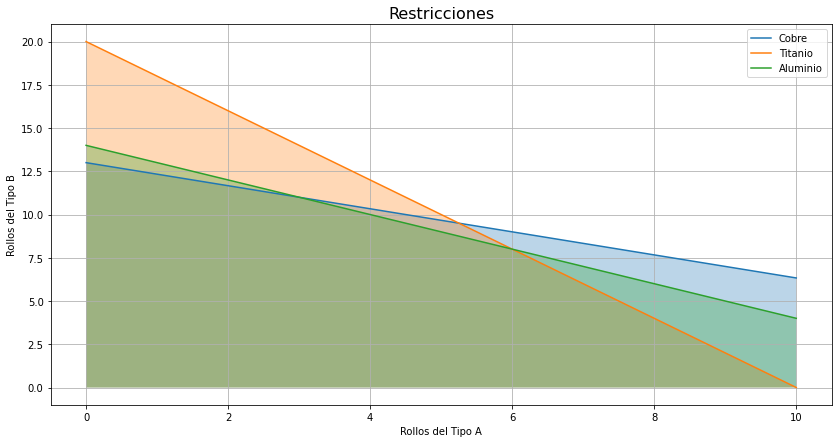

In [21]:
#@title
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0,10)
y1=(-10*x+195)/15
y2=(-2*x+20)
y3=14-x
plt.figure(figsize=(14,7))
plt.plot(x,y1,label='Cobre')
plt.fill_between(x,y1,alpha=0.3)
plt.plot(x,y2,label='Titanio')
plt.fill_between(x,y2,alpha=0.3)
plt.plot(x,y3,label='Aluminio')
plt.fill_between(x,y3,alpha=0.3)
plt.legend()
plt.title('Restricciones',fontsize=16)
plt.xlabel('Rollos del Tipo A')
plt.ylabel('Rollos del Tipo B')
plt.grid()

Se requiere hacer el plan de producción de dos productos **Producto 1 y 2** con el uso de dos ingredientes **A y B**. La cantidad disponible es **A=30** unidades y **B=44**. La producción requiere de:

* 3 unidades de **A** y 8 unidades de **B** para producir el **Producto 1**
* 6 unidades de **A** y 4 unidades de **B** para producir el **Producto 2**

Hay al menos 5 unidades del **Producto 1** y 4 unidades del **Producto 2**. El producto 1 puede ser vendido por 100 y el producto 2 puede ser vendido por 125. El objetivo es maximizar el beneficio de la producción

In [ ]:
!pip install gekko

     |████████████████████████████████| 10.8MB 12.0MB/s 


In [ ]:
from gekko import GEKKO

In [ ]:
m=GEKKO()
x1=m.Var() #producto 1
x2=m.Var() #producto 2
m.Maximize(100*x1+125*x2) #funcion objetivo
m.Equation(3*x1+6*x2<=30) #unidades de A
m.Equation(8*x1+4*x2<=44) #unidades de B
m.solve()

apm 35.245.65.215_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:              4
 Number of total equations: -            2
 Number of slack variables: -            2
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program c

In [ ]:
p1=x1.value[0]
p2=x2.value[0]
print('Producto 1 ',p1)
print('Producto 2 ',p2)
print('Profit ',100*p1+125*p2)

Producto 1  4.0000000005
Producto 2  3.0000000014
Profit  775.000000225


In [ ]:
from scipy.optimize import linprog

In [ ]:
c=[-100,-125]
A=[[3,6],[8,4]]
b=[30,44]
x0_bounds=(0,5)
x1_bounds=(0,4)
res=linprog(c,A_ub=A,b_ub=b,\
            bounds=(x0_bounds,x1_bounds),
            options={"disp":True})
print(res)

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 -225.0              
0.1954734975464     0.1954734975464     0.1954734975464     0.8151046518636  0.1954734975465     -432.5883006987     
0.01672002013426    0.01672002013427    0.01672002013427    0.9299492396439  0.0167200201343     -734.2508248454     
1.120332348627e-05  1.120332237116e-05  1.12033223714e-05   0.9994467181632  1.120331485401e-05  -774.971529105      
5.603101111059e-10  5.60302623559e-10   5.603025345278e-10  0.9999499878171  5.601701786094e-10  -774.9999985761     
Optimization terminated successfully.
         Current function value: -774.999999 
         Iterations: 4
     con: array([], dtype=float64)
     fun: -774.9999985760514
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([5.37016689e-08, 8.46273309e-08])
  status: 

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
!pip install pulp

     |████████████████████████████████| 40.6MB 111kB/s 


In [ ]:
from pulp import *

In [ ]:
prob = LpProblem("Producci[on", LpMaximize)  # Create a LP maximization problem

x1 = LpVariable("x1", lowBound=0,upBound=5) # Create a variable x1 >= 0
x2 = LpVariable("x2", lowBound=0,upBound=4) # Create another variable x2 >= 0

prob += (100*x1+125*x2,'Objective function')
prob += (3*x1+6*x2<=30, 'Finishing hours')
prob += (8*x1+4*x2<=44,  'Carpentry hours')
prob  # Display the LP problem

Producci[on:
MAXIMIZE
100*x1 + 125*x2 + 0
SUBJECT TO
Finishing_hours: 3 x1 + 6 x2 <= 30

Carpentry_hours: 8 x1 + 4 x2 <= 44

VARIABLES
x1 <= 5 Continuous
x2 <= 4 Continuous

In [ ]:
status = prob.solve()  # Solve with the default solver

In [ ]:
# Get the results
print(f"status: {prob.status}, {LpStatus[prob.status]}")
print(f"objective: {prob.objective.value()}")

for var in prob.variables():
    print(f"{var.name}: {var.value()}")

status: 1, Optimal
objective: 775.0
x1: 4.0
x2: 3.0



------------------------

Una empresa de instalaciones dispone de 195 kg de cobre, 20 kg de titanio y 14 kg de aluminio. Para fabricar 100 metros de cable de tipo A se necesitan 10 kg de cobre, 2 de titanio y 1 de aluminio, mientras que para fabricar 100 metros de cable de tipo B se necesitan 15 kg de cobre, 1 de titanio y 1 de aluminio. El beneficio que se obtiene por 100 metros de cable de tipo A es de 1500 euros, y por 100 metros de cable de tipo B, 1000 euros. Calcular los metros de cable de cada tipo que hay que fabricar para maximizar el beneficio de la empresa.

Variables : En el planteamiento del problema notamos que todos los datos están referidos a 100 metros de cable, en base a esto podemos definir las variables como : 
A = Cantidad de “rollos” de 100 mts. de cable del tipo A a fabricar. 
B = Cantidad de “rollos” de 100 mts. de cable del tipo B a fabricar. 

Función Objetivo : $Z = 1,500 A + 1,000 B$ (maximizar) 

Restricciones : Se recomienda elaborar una tabla donde se refleje toda la información disponible para visualizar mejor las restricciones del problema.

|Metal |	A|	B|	disponibilidad|
|-|-|-|-|
|Kilogramos de cobre|	10|	15|	195|
|Kilogramos de titanio|	2|	1|	20|
|Kilogramos de aluminio|	1|	1|	14|

Maximizar:

$1500*A + 1000*B $

Sujeto a:
* $10 A + 15 B <= 195$

* $2 A + B <= 20$

* $A + B <= 14$


In [ ]:
prob = LpProblem("Fabricación_de_cable", LpMaximize)  # Create a LP maximization problem

cableA = LpVariable("A", lowBound=0, cat='Integer') # Create a variable A >= 0
cableB = LpVariable("B", lowBound=0, cat='Integer') # Create another variable B >= 0

prob += 1500*cableA+1000*cableB  # Objective function
prob += (10*cableA+15*cableB<=195,'Cobre')
prob += (2*cableA+cableB<=20,'Titanio')
prob += (cableA+cableB<=14,'Aluminio')
prob  # Display the LP problem

Fabricación_de_cable:
MAXIMIZE
1500*A + 1000*B + 0
SUBJECT TO
Cobre: 10 A + 15 B <= 195

Titanio: 2 A + B <= 20

Aluminio: A + B <= 14

VARIABLES
0 <= A Integer
0 <= B Integer

In [ ]:
status = prob.solve()  # Solve with the default solver
LpStatus[status]  # Print the solution status

'Optimal'

In [ ]:
print(f"objetivo: {prob.objective.value()}")
for var in prob.variables():
  print(f"{var.name}: {var.value()}")

objetivo: 17000.0
A: 6.0
B: 8.0


In [ ]:
for name, constraint in prob.constraints.items():
  print(f"{name}: {constraint.value()}")

Cobre: -15.0
Titanio: 0.0
Aluminio: 0.0


El beneficio máximo asciende a **17,000** euros y se obtiene fabricando:

* **600** metros (6 rollos de 100 metros) de cable de tipo **A** y 
* **800** metros (8 rollos de 100 metros) de tipo **B**.


---------------

Se desea obtener la mezcla de petróleo a partir de crudos de distintas procedencias, cada uno de los cuales tienen distintas características. En la siguiente tabla se detallan los distintos crudos (4 en total) y sus características más importantes: el tanto por ciento de azufre, la densidad y el precio por TM.

Se requiere que la mezcla tenga 40% de contenido de asufre y una densidad igual al 91%. Se desea que el precio de la mezcla sea el mínimo.

Variables de decisión:
* $K$ cantidad de crudo de *Kuwait*
* $A$ cantidad de crudo de *Arabia*
* $N$ cantidad de crudo de *Noruega*
* $V$ cantidad de crudo de *Venezuela*

La función objetivo es minimizar el precio de la mezcla. Sabemos en cuánto contribuye cada crudo en el precio, por lo tanto la función objetivo es
$$
MinZ=35000K+31000A+39000N+34000V
$$

En las restricciones se requiere que la mezcla de los crudos tenga el 40% de asufre, por lo tanto la combinación de los crudos debe ser igual a 0.4
$$
0.45K+0.4A+0.38N+0.41V=0.4
$$
La segunda restricción requiere que la densidad de la mezcla de crudos sea de 0.91, por lo tanto
$$
0.91K+0.95A+0.89N+0.92V=0.91
$$
Por otro lado, aunque no se mensione en el problema, la suma de las proporciones de cada crudo debe ser la unidad
$$
K+A+N+V=1
$$
El problema de programación lineal queda expresado como

Funcion objetivo $Z=35000K+31000A+39000N+34000V$

Sujeto a:
* $0.45K+0.4A+0.38N+0.41V=0.4$
* $0.91K+0.95A+0.89N+0.92V=0.91$
* $K+A+N+V=1$


In [ ]:
prob = LpProblem("Fabricación_de_crudo", LpMaximize)  # Create a LP maximization problem

K = LpVariable("K", lowBound=0) # Kuwait >= 0
A = LpVariable("A", lowBound=0) # Arabia >= 0
N = LpVariable("N", lowBound=0) # Noruega >= 0
V = LpVariable("V", lowBound=0) # Venezuela >= 0

prob += 3500*K+31000*A+39000*N+34000*V    # Objective function
prob += (0.45*K+0.4*A+0.38*N+0.41*V==0.4,'contenido de asufre')
prob += (0.91*K+0.95*A+0.89*N+0.92*V==0.91,'densidad')
prob += (K+A+N+V==1,'suma de proporciones')
prob  # Display the LP problem

Fabricación_de_crudo:
MAXIMIZE
31000*A + 3500*K + 39000*N + 34000*V + 0
SUBJECT TO
contenido_de_asufre: 0.4 A + 0.45 K + 0.38 N + 0.41 V = 0.4

densidad: 0.95 A + 0.91 K + 0.89 N + 0.92 V = 0.91

suma_de_proporciones: A + K + N + V = 1

VARIABLES
A Continuous
K Continuous
N Continuous
V Continuous

In [ ]:
status = prob.solve()  # Solve with the default solver
LpStatus[status]  # Print the solution status

'Optimal'

In [ ]:
print(f"objetivo: {prob.objective.value()}")
for var in prob.variables():
  print(f"{var.name}: {var.value()}")

objetivo: 35666.66665
A: 0.0
K: 0.0
N: 0.33333333
V: 0.66666667


In [ ]:
for name, constraint in prob.constraints.items():
  print(f"{name}: {constraint.value()}")

contenido_de_asufre: 9.999995276288587e-11
densidad: 1.0000011929633956e-10
suma_de_proporciones: 0.0
